## From 
https://www.rasgoml.com/feature-engineering-tutorials/backward-stepwise-feature-selection-with-scikit-learn

In [2]:

import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris
# import category_encoders as ce

from sklearn.ensemble import GradientBoostingRegressor


In [1]:
import dtale

In [10]:
import itertools
import time
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.style.use('ggplot')


In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from icecream import ic
import seaborn as sns
import matplotlib as plt
import pandas as pd
from datetime import datetime

### Predictors I should pick
1. Length of the orbit crossing the lake: orbit_leng
2. Area of the lake influence by the orbit: area_buffe
3. Lake area: Lake_area
4. Topography roughness: TRI_mdn
5. Variability of Lake surface water elevation (Option 1): APL
6. Variability of Lake surface water elevation (Option 2 flashiness index Baker 2004): rb_index
7. Variance of observations?? roughness. Standard deviation of the differences, based on https://stats.stackexchange.com/questions/24607/how-to-measure-smoothness-of-a-time-series-in-r. I have std_diff and mean_diff. To calculate the variability it should be std_diff/abs(mean_diff) if mean diff!=0
8. Probablility of ICE ??
##3 Reponse variables to try

In [3]:
#Bring the data 

path_win='/home/angelica/Dropbox/apps/python_pychm/locss/data/area_orbits_in_lakes/area_orbits_in_lakes_single.shp'


df_shp_lenghts=gpd.read_file(path_win)
df_shp_lenghts.head()
path_results='../data/results/comparison__20221111_11_20.csv'

# path_results='../data/results/comparison_ALL_20220906_16_59.csv'

df_results=pd.read_csv(path_results)
# print(df_results.head())
# df_shp_lenghts.head()
ic(df_results.columns)
ic(df_shp_lenghts.columns)

ic| df_results.columns: Index(['Unnamed: 0', 'station', 'altis', 'name_altis', 'source', 'method', 'R',
                               'PR_pvalue', 'RHO', 'RHO_pvalue', 'NSF', 'RMSE', 'APL', 'VE', 'cv_obs',
                               'n_obs', 'rb_index', 'std_diff', 'mean_diff', 'sat_min_utcdate',
                               'sat_max_utcdate', 'grd_min_utcdate', 'grd_max_utcdate'],
                              dtype='object')
ic| df_shp_lenghts.columns: Index(['Slope_100', 'Lake_type', 'Lake_area', 'lake_name', 'Wshd_area',
                                   'Pour_long', 'source', 'Hylak_id', 'Computed', 'layer', 'Elevation',
                                   'orbit_leng', 'gauge_id', 'Pour_lat', 'area_buffe', 'Country',
                                   'new_area_l', 'USE', 'VS', 'geometry'],
                                  dtype='object')


Index(['Slope_100', 'Lake_type', 'Lake_area', 'lake_name', 'Wshd_area',
       'Pour_long', 'source', 'Hylak_id', 'Computed', 'layer', 'Elevation',
       'orbit_leng', 'gauge_id', 'Pour_lat', 'area_buffe', 'Country',
       'new_area_l', 'USE', 'VS', 'geometry'],
      dtype='object')

In [6]:
dtale.show(df_shp_lenghts[['gauge_id','area_buffe', 'VS']])

/home/angelica/.conda/envs/geo_env/lib/python3.9/site-packages/dtale/views.py:746: FutureWarning:

['VS'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



In [38]:
df_results[['name_altis']]

,name_altis
0,AlTiS_TimeSeries_Sentinel-3A_0261_S0424
1,AlTiS_TimeSeries_Jason-3_GDR_F_0087_S0424
2,AlTiS_TimeSeries_Jason-3_GDR_F_0087_S0420
3,AlTiS_TimeSeries_Sentinel-3A_0104_S0424
4,AlTiS_TimeSeries_Jason-3_GDR_Ffrom2021Test_016...
5,AlTiS_TimeSeries_Jason-3_GDR_FallTest_0163_S0764
6,AlTiS_TimeSeries_Sentinel-3B_land_0446_S0765
7,AlTiS_TimeSeries_Sentinel-3B_land_0446_S0806
8,AlTiS_TimeSeries_Sentinel-3A_land_0760_S0901
9,AlTiS_TimeSeries_Sentinel-3A_0636_N2354


In [7]:
df_merged=pd.merge(df_results,df_shp_lenghts, left_on='name_altis', right_on='VS', how='left')
# df_merged=df_merged.loc[df_merged['source_x']=='LOCSS']
# df_merged=df_merged.loc[~(df_merged['USE'].isnull())]
# df_merged=df_merged.loc[df_merged['USE']!='N']
df_merged.shape
# df_merged.loc[df_merged['r2'].notna()]
df_merged[['station','lake_name','orbit_leng','Lake_area', 'RHO', 'area_buffe']]

,station,lake_name,orbit_leng,Lake_area,RHO,area_buffe
0,12030,Aï¿½ude Araras,3055.960550,67.41,0.928,5.752967
1,12030,Aï¿½ude Araras,3055.960550,67.41,0.928,5.752967
2,12030,NaN,NaN,NaN,0.993,NaN
3,12030,NaN,NaN,NaN,0.967,NaN
4,12030,Aï¿½ude Araras,1442.903457,67.41,0.975,2.929606
5,12030,Aï¿½ude Araras,3055.960550,67.41,0.975,5.752967
6,12036,NaN,NaN,NaN,0.955,NaN
7,12036,NaN,NaN,NaN,-0.448,NaN
8,12036,NaN,NaN,NaN,0.989,NaN
9,12056,NaN,NaN,NaN,-0.643,NaN


In [8]:
df_merged.loc[df_merged['station']=='CFN2','orbit_leng' ]=0
df_merged.loc[df_merged['station']=='CFN2','lake_name' ]='Catfish'
df_merged.loc[df_merged['station']=='CFN2','Lake_area' ]=3.72
df_merged.loc[df_merged['station']=='CFN2','area_buffe' ]=0
df_merged.loc[df_merged['station']=='YSL2','orbit_leng' ]=0
df_merged.loc[df_merged['station']=='YSL2','lake_name' ]='Grays'
df_merged.loc[df_merged['station']=='YSL2','Lake_area' ]=0.27
df_merged.loc[df_merged['station']=='YSL2','area_buffe' ]=0

#Exclude RAW2
df_merged=df_merged.loc[df_merged['station']!='RAW2']
df_merged['per_area_c']=df_merged['area_buffe']/df_merged['Lake_area']

#Format all the names 
df_merged['lake_name']=df_merged['lake_name'].str.replace('Lake', '')
df_merged[['station','lake_name','orbit_leng','Lake_area', 'RHO', 'per_area_c', 'APL']]

,station,lake_name,orbit_leng,Lake_area,RHO,per_area_c,APL
0,12030,Aï¿½ude Araras,3055.960550,67.41,0.928,0.085343,18.239
1,12030,Aï¿½ude Araras,3055.960550,67.41,0.928,0.085343,18.239
2,12030,NaN,NaN,NaN,0.993,NaN,23.423
3,12030,NaN,NaN,NaN,0.967,NaN,19.044
4,12030,Aï¿½ude Araras,1442.903457,67.41,0.975,0.043460,16.456
5,12030,Aï¿½ude Araras,3055.960550,67.41,0.975,0.085343,16.456
6,12036,NaN,NaN,NaN,0.955,NaN,13.516
7,12036,NaN,NaN,NaN,-0.448,NaN,143.107
8,12036,NaN,NaN,NaN,0.989,NaN,15.845
9,12056,NaN,NaN,NaN,-0.643,NaN,15.756


In [10]:
cols=['Lake_area','lake_name','area_buffe','new_area_l','orbit_leng','station','altis','name_altis','rb_index', 'std_diff','mean_diff','per_area_c','source_x','RHO', 'NSF','RMSE', 'APL', 'VE', 'n_obs']

df_t=pd.melt(df_merged[cols], id_vars=['Lake_area','lake_name','area_buffe','new_area_l','orbit_leng','station','altis','name_altis','rb_index', 'std_diff','mean_diff','per_area_c','source_x','APL', 'VE', 'n_obs'], 
             value_vars=['RHO', 'NSF','RMSE'], ignore_index=True)
df_t['mission']=[x.split('_')[2] for x in df_t['altis']]

dtale.show(df_t)

/home/angelica/.conda/envs/geo_env/lib/python3.9/site-packages/dtale/views.py:746: FutureWarning:

['lake_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



In [11]:
#Load TRI 1 and 3 km
import pandas as pd
# df_stats_1km=pd.read_csv('../data/results/TRI_stats_1km.csv', sep=',')
df_stats_3km=pd.read_csv('../data/results/TRI_stats_3km_2.csv', sep=',')
df_t_3km=pd.merge(df_t, df_stats_3km, left_on='station', right_on='gauge_id', how='left')

In [13]:
df_t_3km=df_t_3km.rename(columns={'median':'TRI_mdn'})

In [16]:
df_t_3km_vars=df_t_3km.loc[df_t_3km['variable']=='RHO']

predictors=['Lake_area','orbit_leng', 'area_buffe','per_area_c','TRI_mdn','APL', 'VE', 'n_obs', 'rb_index', 'std_diff','mean_diff']
df_predictors=df_t_3km_vars[predictors].copy()
outcome=df_t_3km_vars['value'].to_numpy().copy()

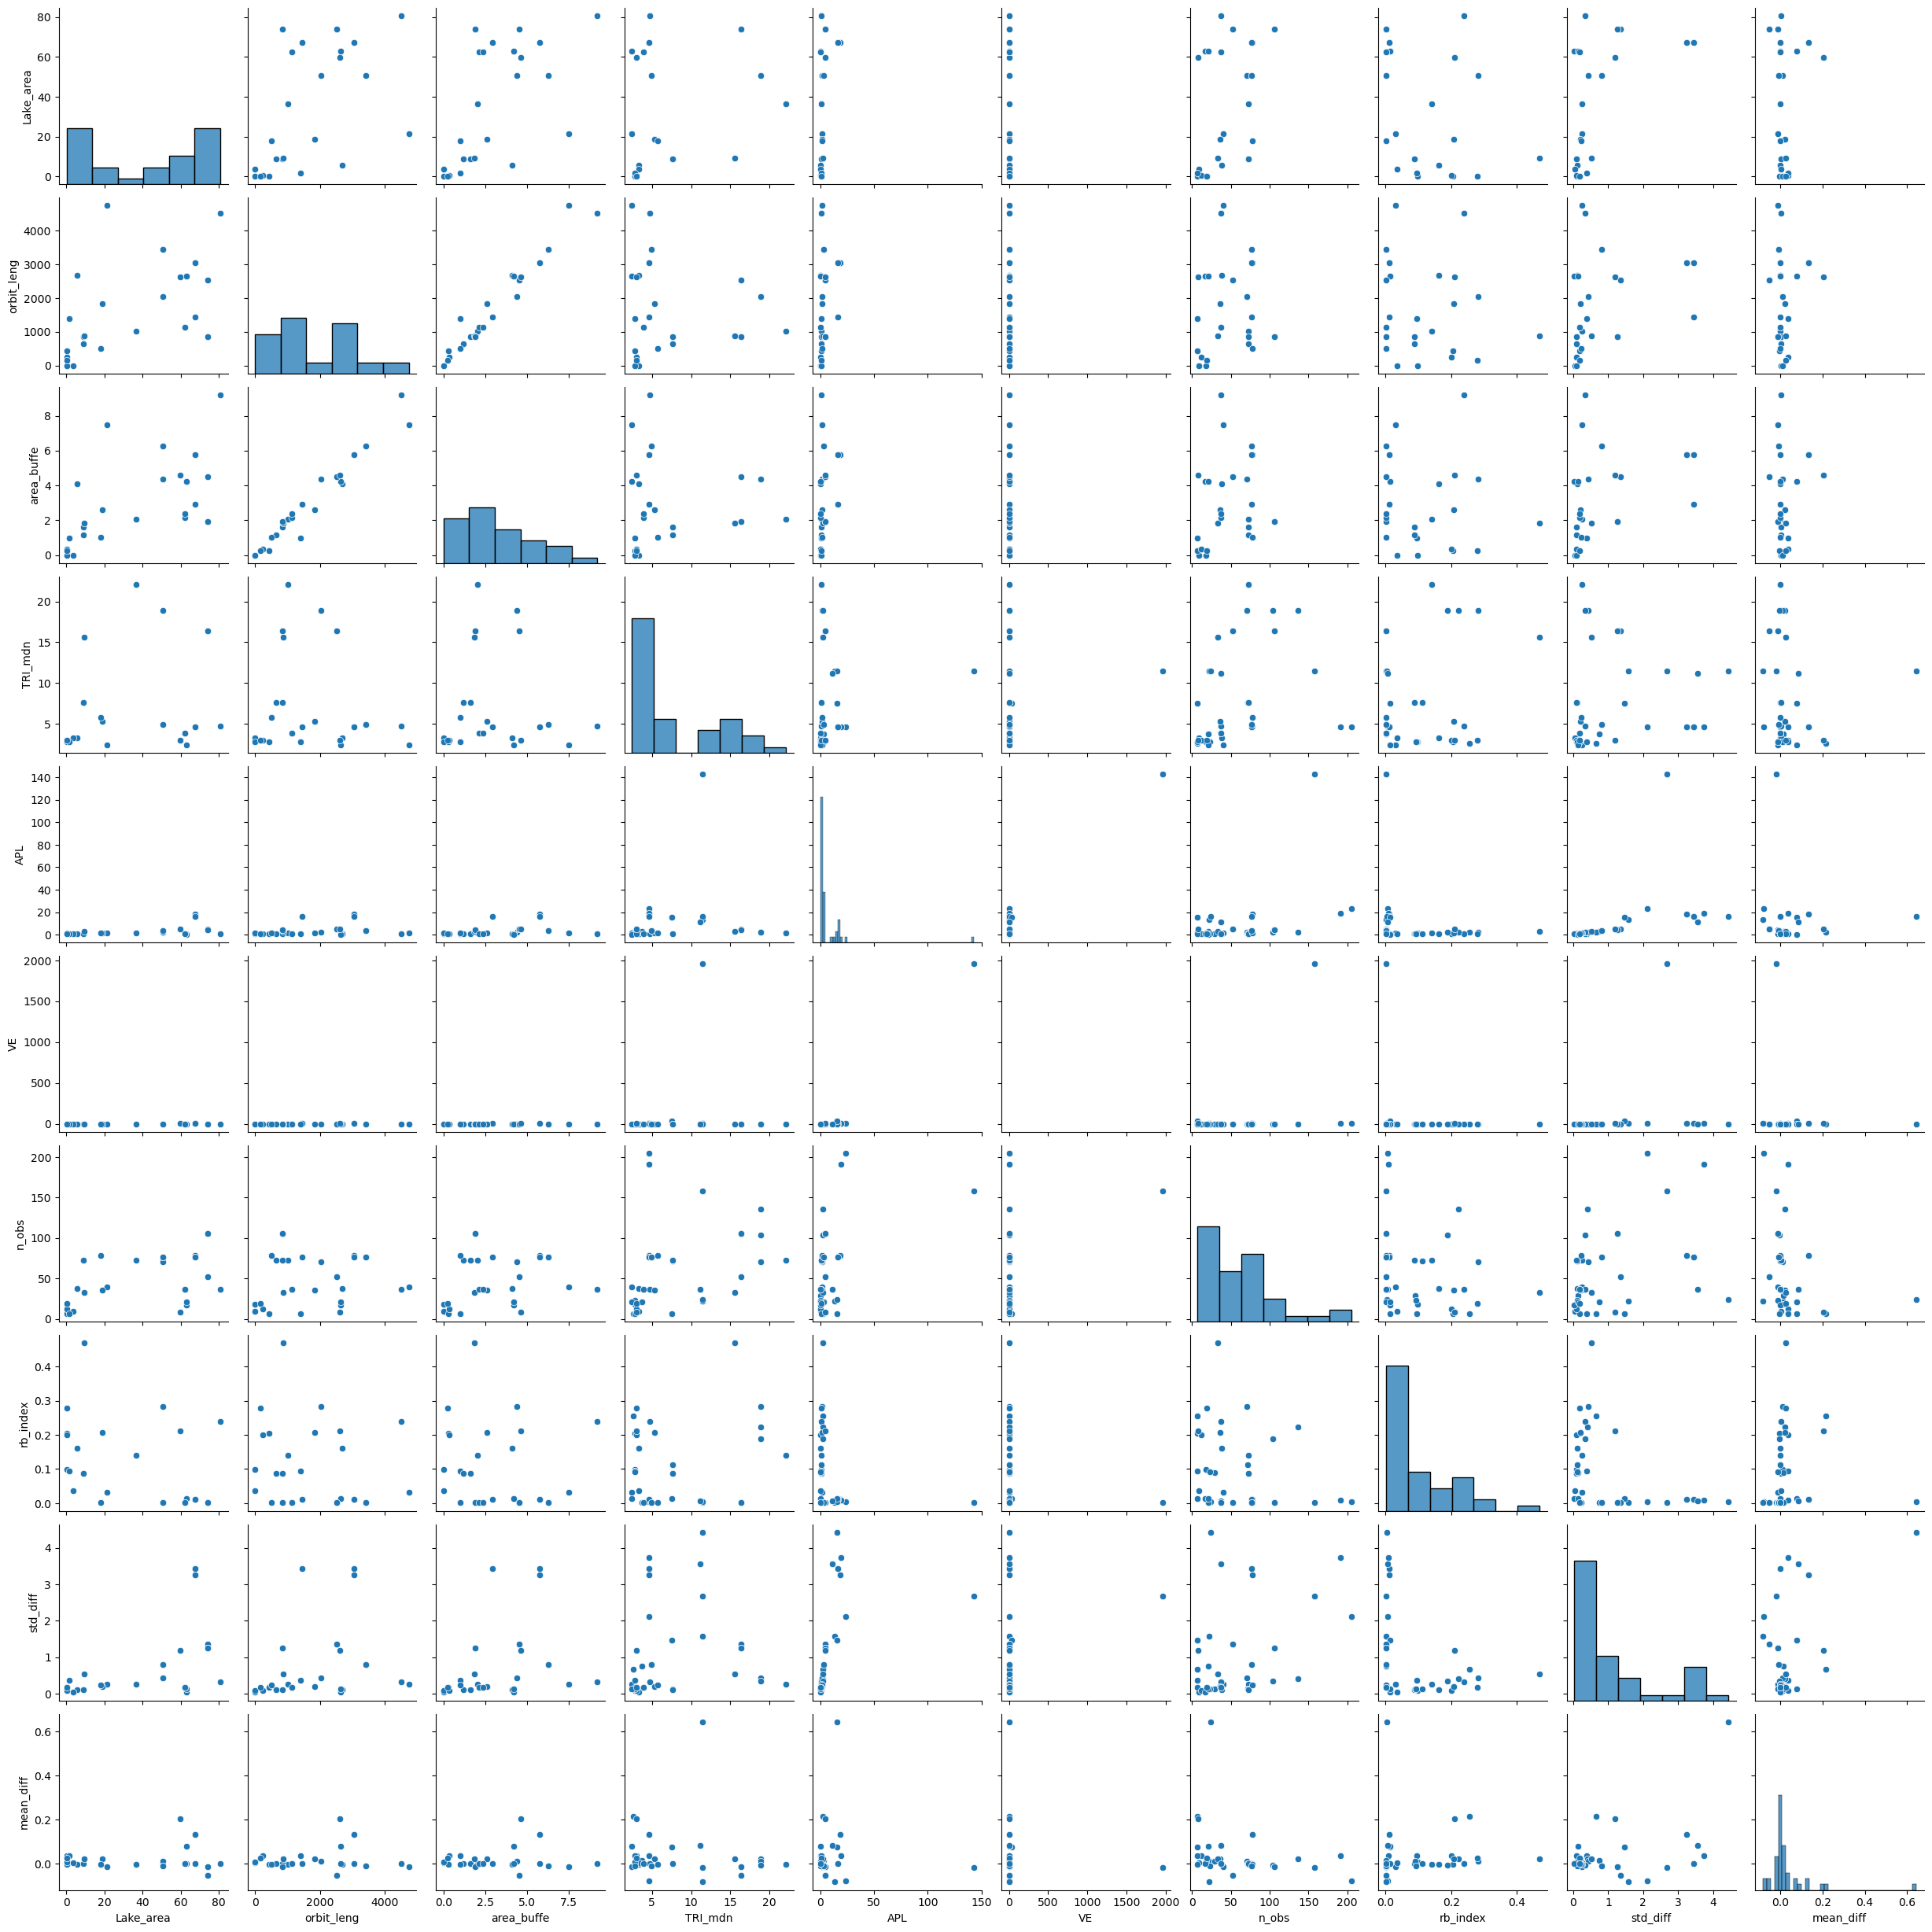

In [23]:
import seaborn as sns
sns.pairplot(df_predictors)

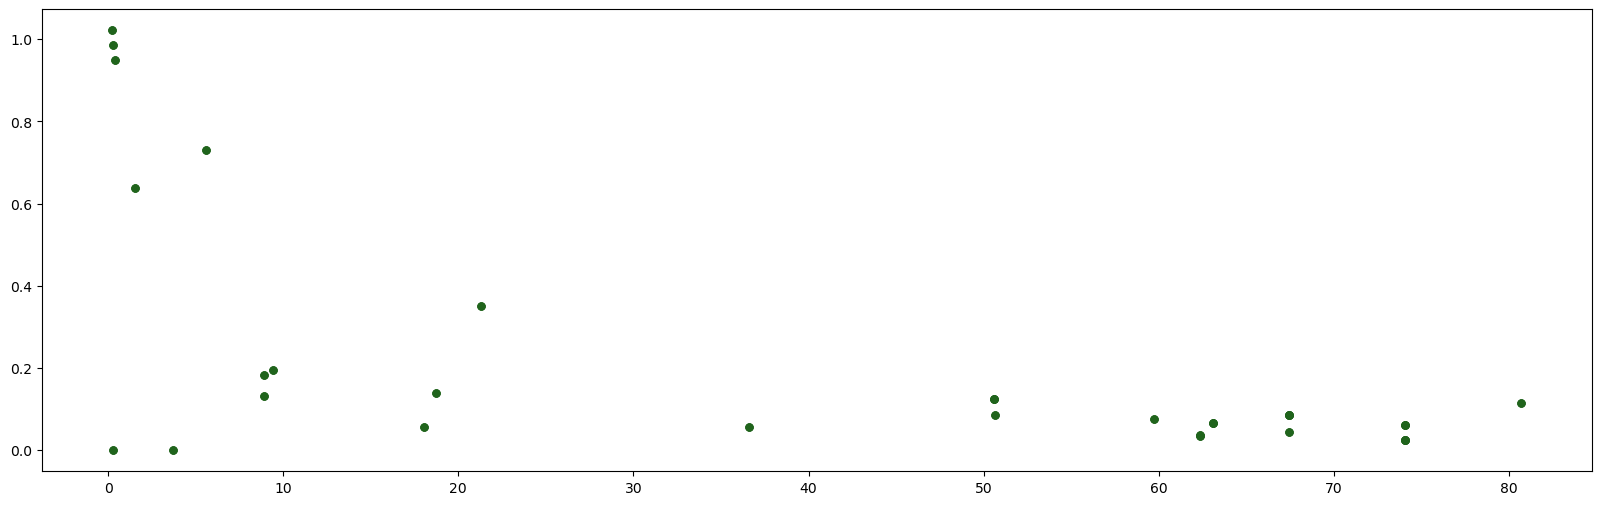

Executing shutdown due to inactivity...


2022-11-11 15:49:46,507 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2022-11-11 15:49:46,556 - INFO     - Executing shutdown...


Exception on /shutdown [GET]
Traceback (most recent call last):
  File "/home/angelica/.conda/envs/geo_env/lib/python3.9/site-packages/flask/app.py", line 2525, in wsgi_app
    response = self.full_dispatch_request()
  File "/home/angelica/.conda/envs/geo_env/lib/python3.9/site-packages/flask/app.py", line 1822, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/home/angelica/.conda/envs/geo_env/lib/python3.9/site-packages/flask/app.py", line 1820, in full_dispatch_request
    rv = self.dispatch_request()
  File "/home/angelica/.conda/envs/geo_env/lib/python3.9/site-packages/flask/app.py", line 1796, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "/home/angelica/.conda/envs/geo_env/lib/python3.9/site-packages/dtale/app.py", line 435, in shutdown
    shutdown_server()
  File "/home/angelica/.conda/envs/geo_env/lib/python3.9/site-packages/dtale/app.py", line 421, in shutdown_server
    raise RuntimeError("Not 

2022-11-11 15:49:46,559 - ERROR    - Exception on /shutdown [GET]
Traceback (most recent call last):
  File "/home/angelica/.conda/envs/geo_env/lib/python3.9/site-packages/flask/app.py", line 2525, in wsgi_app
    response = self.full_dispatch_request()
  File "/home/angelica/.conda/envs/geo_env/lib/python3.9/site-packages/flask/app.py", line 1822, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/home/angelica/.conda/envs/geo_env/lib/python3.9/site-packages/flask/app.py", line 1820, in full_dispatch_request
    rv = self.dispatch_request()
  File "/home/angelica/.conda/envs/geo_env/lib/python3.9/site-packages/flask/app.py", line 1796, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "/home/angelica/.conda/envs/geo_env/lib/python3.9/site-packages/dtale/app.py", line 435, in shutdown
    shutdown_server()
  File "/home/angelica/.conda/envs/geo_env/lib/python3.9/site-packages/dtale/app.py", line 421, in shutdow

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.plot(df_t_3km['Lake_area'], df_t_3km['per_area_c'],  linestyle='None',marker='o', markerfacecolor='#20641c',markeredgecolor='#20641c',markersize=5)

In [8]:
# Build step forward feature selection
sfs1 = SequentialFeatureSelector(clf,n_features_to_select='auto')

# Perform SFFS
sfs1 = sfs1.fit(X, y)

In [9]:
sfs1

SequentialFeatureSelector(estimator=LinearRegression(),
                          n_features_to_select='auto')